# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [3]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [23]:
tips = sns.load_dataset("tips")
tips['porcent_tip'] = tips['tip'] / (tips['tip'] - tips['total_bill'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips

,total_bill,tip,sex,smoker,day,time,size,porcent_tip,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,-0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,-0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,-0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,-0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,-0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,-0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,-0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.108899,16.07


(0.0, 10.5)

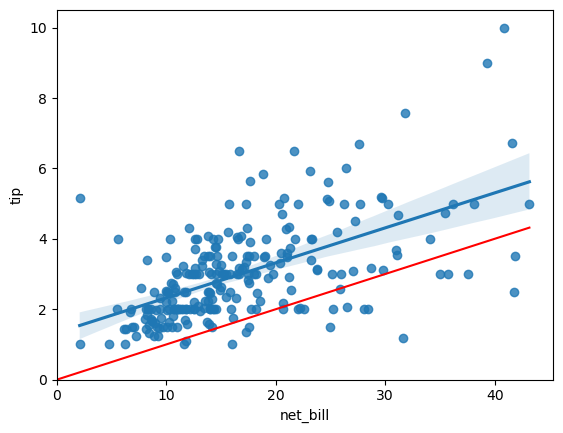

In [25]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['porcent_tip']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [38]:
reg = smf.ols('porcent_tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            porcent_tip   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           1.52e-06
Time:                        17:22:41   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3053      0.023    -13.166      0.000      -0.351      -0.260
net_bill       0.0061      0.001      4.931      0.000       0.004       0.009
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                         -11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

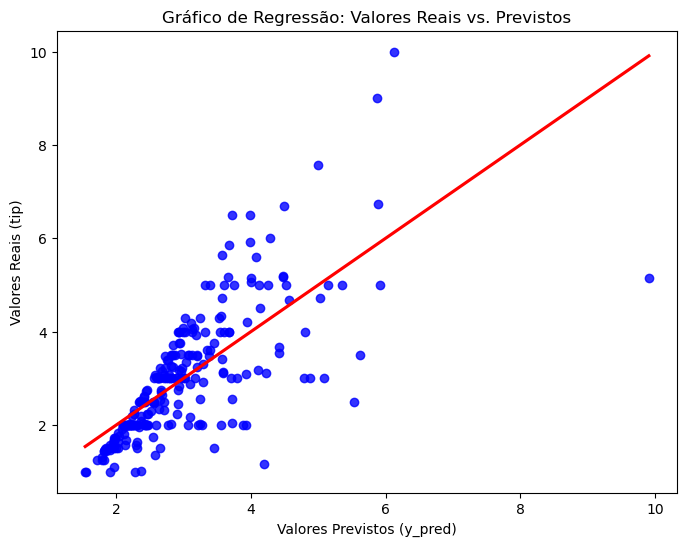

In [61]:
# Gerar os valores previstos (y_pred)

model = smf.ols('tip ~ net_bill + porcent_tip', data=tips).fit()

tips['y_pred'] = model.predict()

# Criar o gráfico de dispersão com uma linha de regressão ajustada
plt.figure(figsize=(8,6))

# Usando regplot para visualizar a relação entre os valores reais e previstos
sns.regplot(x=tips['y_pred'], y=tips['tip'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ci=None)

# Títulos e rótulos
plt.title('Gráfico de Regressão: Valores Reais vs. Previstos')
plt.xlabel('Valores Previstos (y_pred)')
plt.ylabel('Valores Reais (tip)')

# Exibir o gráfico
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

**De forma suscinta o seguno modelo apresenta igualdade nos outliers, o R² mais perto de 1 diz se o modelo é viavel ou não, por tanto o segundo modelo é melhor.** 

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [42]:
# 4.1
dados_novos = tips[0:5]
reg.predict(dados_novos)

0   -0.207087
1   -0.251951
2   -0.197684
3   -0.180107
4   -0.176358
dtype: float64

In [44]:
# 4.2
new_data = {'porcent_tip': [0.15], 'net_bill': [20]}
reg.predict(new_data)


0   -0.182381
dtype: float64

In [49]:
# 4.3 
r_squared = reg.rsquared
print(f"R²: {r_squared}")

R²: 0.09129084920662944


In [63]:
# 4.4
r_squared = model.rsquared
print(f"R²: {r_squared}")

R²: 0.5228056660862084
